In [119]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

#from lime import lime_text
#from lime.lime_text import LimeTextExplainer

import textwrap
import spacy

import pickle

In [120]:
#Modele
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
#from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [121]:
import importlib
import myfunctions

importlib.reload(myfunctions)

<module 'myfunctions' from '/Users/andrzejrostkowski/python-code/PRACA_LICENCJACKA/FINAL/myfunctions.py'>

In [122]:
from myfunctions import evaluate_model, tfidf_vectorize, spacy_embedding

In [123]:
data = pd.read_csv('DANE/df_preprocessed_v2.csv')
data.head()

,Unnamed: 0,nr,text,label,target
0,0,5000,Talkin' Tacos & Bowls is my go-to spot for tas...,CG,1.0
1,1,5001,I recently dined at this restaurant and was im...,CG,1.0
2,2,5002,The visit to this charming vineyard was a deli...,CG,1.0
3,3,5003,"I recently visited Berry Sweet, which opened i...",CG,1.0
4,4,5004,I stumbled upon this gem of a restaurant and w...,CG,1.0


In [124]:
data.drop(["Unnamed: 0","nr"],axis=1,inplace=True)
data.head()

,text,label,target
0,Talkin' Tacos & Bowls is my go-to spot for tas...,CG,1.0
1,I recently dined at this restaurant and was im...,CG,1.0
2,The visit to this charming vineyard was a deli...,CG,1.0
3,"I recently visited Berry Sweet, which opened i...",CG,1.0
4,I stumbled upon this gem of a restaurant and w...,CG,1.0


In [ ]:
data.drop(["Unnamed: 0","nr"],axis=1,inplace=True)
data.head()

,text,label,target
0,Talkin' Tacos & Bowls is my go-to spot for tas...,CG,1.0
1,I recently dined at this restaurant and was im...,CG,1.0
2,The visit to this charming vineyard was a deli...,CG,1.0
3,"I recently visited Berry Sweet, which opened i...",CG,1.0
4,I stumbled upon this gem of a restaurant and w...,CG,1.0


# TRENOWANIE MODELU

## TF-IDF

In [125]:
#Dla TFIDF
x_train,x_test,y_train,y_test = train_test_split(data['text'],data['target'],test_size=0.2, random_state = 1)

In [126]:
models_tfidf = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('SVM', LinearSVC()),
    ('MLP', MLPClassifier(max_iter=1000)),
]

trained_models_tfidf = {}

for name, model in models_tfidf:
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', model),
    ])
    print(f"Training {name}...")
    model = pipe.fit(x_train, y_train)
    print(f"Evaluating {name}...")
    evaluate_model(model, x_test, y_test, cm=False)

    # Zapisz model
    trained_models_tfidf[name]=model

Training Logistic Regression...
Evaluating Logistic Regression...
Accuracy:   97.981
Precision:   98.786
Recall:   97.213
F1 score:   97.993
Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
Accuracy:   87.888
Precision:   82.741
Recall:   96.167
F1 score:   88.950
Training Random Forest...
Evaluating Random Forest...
Accuracy:   96.720
Precision:   98.353
Recall:   95.122
F1 score:   96.711
Training Multinomial Naive Bayes...
Evaluating Multinomial Naive Bayes...
Accuracy:   96.114
Precision:   97.540
Recall:   94.724
F1 score:   96.111
Training SVM...


/Users/andrzejrostkowski/python-code/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Evaluating SVM...
Accuracy:   98.385
Precision:   98.894
Recall:   97.909
F1 score:   98.399
Training MLP...
Evaluating MLP...
Accuracy:   98.183
Precision:   98.304
Recall:   98.109
F1 score:   98.206


Accuracy:   97.981
Precision:   98.786
Recall:   97.213
F1 score:   97.993


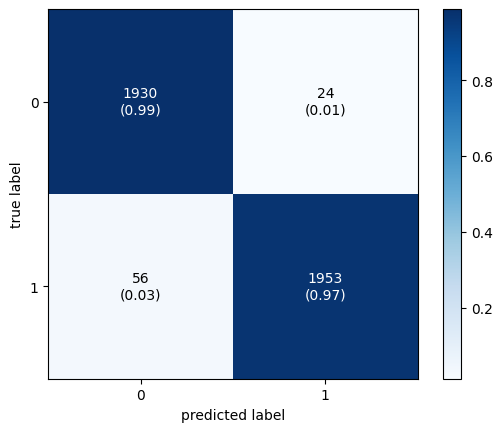

(0.9798132727731517,
 0.9878603945371776,
 0.9721254355400697,
 0.9799297541394882)

In [127]:
evaluate_model(trained_models_tfidf['Logistic Regression'], x_test, y_test, cm=True)

In [128]:
for name, model in trained_models_tfidf.items():
    # Zapisz model do pliku
    with open(f'MODELE/{name}_model_tfidf.pkl', 'wb') as f:
        pickle.dump(model, f)

## SPACY

In [129]:
# Załaduj model spaCy
nlp = spacy.load("en_core_web_sm")

data_df = data['text'].to_frame()
data_df.columns = ['text']

# Przygotuj dane do treningu i testowania
data_embedded = spacy_embedding(data_df, "text", [], nlp)

/Users/andrzejrostkowski/python-code/.venv/lib/python3.9/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0.0 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [130]:
#Dla Spacy
xe_train,xe_test,ye_train,ye_test = train_test_split(data_embedded,data['target'],test_size=0.2, random_state = 1)

In [131]:
models_spacy = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
#    ('Multinomial Naive Bayes', MultinomialNB()), ## nie obluguje ujemnych wartosci
    ('SVM', LinearSVC()),
    ('MLP', MLPClassifier(max_iter=1000)),
]

In [132]:
trained_models_spacy = {}

for name, model in models_spacy:
    print(f"Training {name}...")
    model.fit(xe_train, ye_train)
    print(f"Evaluating {name}...")
    evaluate_model(model, xe_test, ye_test, cm=False)

    # Zapisz model
    trained_models_spacy[name]=model

Training Logistic Regression...
Evaluating Logistic Regression...
Accuracy:   92.228
Precision:   92.890
Recall:   91.687
F1 score:   92.285
Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
Accuracy:   90.033
Precision:   89.061
Recall:   91.588
F1 score:   90.307
Training Random Forest...
Evaluating Random Forest...
Accuracy:   89.831
Precision:   91.477
Recall:   88.153
F1 score:   89.785
Training SVM...


/Users/andrzejrostkowski/python-code/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Evaluating SVM...
Accuracy:   92.834
Precision:   93.451
Recall:   92.334
F1 score:   92.889
Training MLP...
Evaluating MLP...
Accuracy:   95.130
Precision:   95.174
Recall:   95.222
F1 score:   95.198


Accuracy:   92.228
Precision:   92.890
Recall:   91.687
F1 score:   92.285


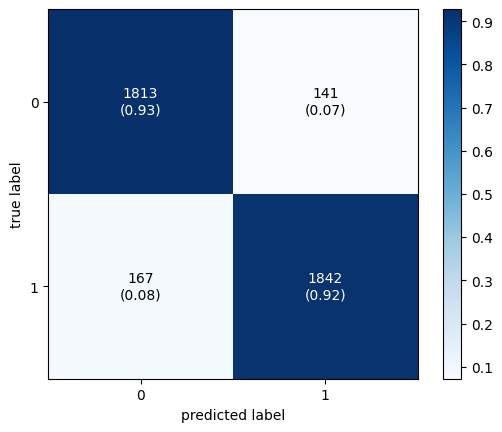

(0.9222811001766339,
 0.9288956127080181,
 0.9168740666998507,
 0.9228456913827655)

In [133]:
evaluate_model(trained_models_spacy['Logistic Regression'], xe_test, ye_test, cm=True)

In [134]:
for name, model in trained_models_spacy.items():
    # Zapisz model do pliku
    with open(f'MODELE/{name}_model_spacy.pkl', 'wb') as f:
        pickle.dump(model, f)

## LINGUISTIC

In [2]:
import spacy
import lftk

# load a trained pipeline of your choice from spacy
# remember we already downloaed "en_core_web_sm" pipeline above?
nlp = spacy.load("en_core_web_sm")

# create a spaCy doc object
doc = nlp("I love research but my professor is strange.")

# initiate LFTK extractor by passing in doc
# you can pass in a list of multiple docs
LFTK = lftk.Extractor(docs = doc)

# optionally, you can customize how LFTK extractor calculates handcrafted linguistic features
# for example, include stop word? include puncutaion? maximum decimal digits?
LFTK.customize(stop_words=True, punctuations=False, round_decimal=3)

# now, extract the handcrafted linguistic features that you need
# refer to them as feature keys
extracted_features = LFTK.extract(features = ["a_word_ps", "a_kup_pw", "n_noun"])

# {'a_word_ps': 8.0, 'a_kup_pw': 5.754, 'n_noun': 2}
print(extracted_features)

/Users/andrzejrostkowski/python-code/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/andrzejrostkowski/python-code/.venv/lib/python3.9/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0.0 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


{'a_word_ps': 8.0, 'a_kup_pw': 5.754, 'n_noun': 2}


In [13]:
import lftk

# returns all available features as a list of dictionaries by default
searched_features = lftk.search_features()

# [{'key': 't_word', 'name': 'total_number_of_words', 'formulation': 'foundation', 'domain': 'surface', 'family': 'wordsent'}, {'key': 't_uword', 'name': 'total_number_of_unique_words', 'formulation': 'foundation', 'domain': 'surface', 'family': 'wordsent'}, {'key': 't_sent', 'name': 'total_number_of_sentences', 'formulation': 'foundation', 'domain': 'surface', 'family': 'wordsent'},...]
print(searched_features)

# specify attributes
#searched_features = lftk.search_features(domain = "surface", family = "avgwordsent")

# [{'key': 'a_word_ps', 'name': 'average_number_of_words_per_sentence', 'formulation': 'derivation', 'domain': 'surface', 'family': 'avgwordsent'}, {'key': 'a_char_ps', 'name': 'average_number_of_characters_per_sentence', 'formulation': 'derivation', 'domain': 'surface', 'family': 'avgwordsent'}, {'key': 'a_char_pw', 'name': 'average_number_of_characters_per_word', 'formulation': 'derivation', 'domain': 'surface', 'family': 'avgwordsent'}]
#print(searched_features)

# return pandas dataframe instead of list of dictionaries
#searched_features = lftk.search_features(return_format = "pandas")

#   key                                             name formulation   domain       family
#4  a_word_ps       average_number_of_words_per_sentence  derivation  surface  avgwordsent
#5  a_char_ps  average_number_of_characters_per_sentence  derivation  surface  avgwordsent
#6  a_char_pw      average_number_of_characters_per_word  derivation  surface  avgwordsent
print(searched_features)

[{'key': 't_word', 'name': 'total_number_of_words', 'formulation': 'foundation', 'domain': 'surface', 'family': 'wordsent', 'language': 'general'}, {'key': 't_stopword', 'name': 'total_number_of_stop_words', 'formulation': 'foundation', 'domain': 'surface', 'family': 'wordsent', 'language': 'general'}, {'key': 't_punct', 'name': 'total_number_of_punctuations', 'formulation': 'foundation', 'domain': 'syntax', 'family': 'wordsent', 'language': 'general'}, {'key': 't_syll', 'name': 'total_number_of_syllables', 'formulation': 'foundation', 'domain': 'surface', 'family': 'wordsent', 'language': 'en'}, {'key': 't_syll2', 'name': 'total_number_of_words_more_than_two_syllables', 'formulation': 'foundation', 'domain': 'surface', 'family': 'wordsent', 'language': 'en'}, {'key': 't_syll3', 'name': 'total_number_of_words_more_than_three_syllables', 'formulation': 'foundation', 'domain': 'surface', 'family': 'wordsent', 'language': 'en'}, {'key': 't_uword', 'name': 'total_number_of_unique_words', '

In [20]:
import spacy
import lftk

# load a trained pipeline of your choice from spacy
# remember we already downloaed "en_core_web_sm" pipeline above?
nlp = spacy.load("en_core_web_sm")

# create a spaCy doc object
doc = nlp("I love research but my professor is strange.")

# initiate LFTK extractor by passing in doc
# you can pass in a list of multiple docs
LFTK = lftk.Extractor(docs = doc)

# optionally, you can customize how LFTK extractor calculates handcrafted linguistic features
# for example, include stop word? include puncutaion? maximum decimal digits?
LFTK.customize(stop_words=True, punctuations=False, round_decimal=3)

# now, extract the handcrafted linguistic features that you need
#all :)
keys = [feature['key'] for feature in searched_features]


# refer to them as feature keys
extracted_features = LFTK.extract(features = keys)

# {'a_word_ps': 8.0, 'a_kup_pw': 5.754, 'n_noun': 2}
print(extracted_features)

/Users/andrzejrostkowski/python-code/.venv/lib/python3.9/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0.0 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


{'t_word': 8, 't_stopword': 4, 't_punct': 1, 't_syll': 11, 't_syll2': 1, 't_syll3': 0, 't_uword': 9, 't_sent': 1, 't_char': 36, 'a_word_ps': 8.0, 'a_char_ps': 36.0, 'a_char_pw': 4.5, 'a_syll_ps': 11.0, 'a_syll_pw': 1.375, 'a_stopword_ps': 4.0, 'a_stopword_pw': 0.5, 't_kup': 46.03, 't_bry': 28.7, 't_subtlex_us_zipf': 40.773, 'a_kup_pw': 5.754, 'a_bry_pw': 3.587, 'a_kup_ps': 46.03, 'a_bry_ps': 28.7, 'a_subtlex_us_zipf_pw': 5.097, 'a_subtlex_us_zipf_ps': 40.773, 't_n_ent': 0, 't_n_ent_person': 0, 't_n_ent_norp': 0, 't_n_ent_fac': 0, 't_n_ent_org': 0, 't_n_ent_gpe': 0, 't_n_ent_loc': 0, 't_n_ent_product': 0, 't_n_ent_event': 0, 't_n_ent_art': 0, 't_n_ent_law': 0, 't_n_ent_language': 0, 't_n_ent_date': 0, 't_n_ent_time': 0, 't_n_ent_percent': 0, 't_n_ent_money': 0, 't_n_ent_quantity': 0, 't_n_ent_ordinal': 0, 't_n_ent_cardinal': 0, 'a_n_ent_pw': 0.0, 'a_n_ent_person_pw': 0.0, 'a_n_ent_norp_pw': 0.0, 'a_n_ent_fac_pw': 0.0, 'a_n_ent_org_pw': 0.0, 'a_n_ent_gpe_pw': 0.0, 'a_n_ent_loc_pw': 0.0, 

In [21]:
keys = [feature['key'] for feature in searched_features]
print(keys)
len(keys)


['t_word', 't_stopword', 't_punct', 't_syll', 't_syll2', 't_syll3', 't_uword', 't_sent', 't_char', 'a_word_ps', 'a_char_ps', 'a_char_pw', 'a_syll_ps', 'a_syll_pw', 'a_stopword_ps', 'a_stopword_pw', 't_kup', 't_bry', 't_subtlex_us_zipf', 'a_kup_pw', 'a_bry_pw', 'a_kup_ps', 'a_bry_ps', 'a_subtlex_us_zipf_pw', 'a_subtlex_us_zipf_ps', 't_n_ent', 't_n_ent_person', 't_n_ent_norp', 't_n_ent_fac', 't_n_ent_org', 't_n_ent_gpe', 't_n_ent_loc', 't_n_ent_product', 't_n_ent_event', 't_n_ent_art', 't_n_ent_law', 't_n_ent_language', 't_n_ent_date', 't_n_ent_time', 't_n_ent_percent', 't_n_ent_money', 't_n_ent_quantity', 't_n_ent_ordinal', 't_n_ent_cardinal', 'a_n_ent_pw', 'a_n_ent_person_pw', 'a_n_ent_norp_pw', 'a_n_ent_fac_pw', 'a_n_ent_org_pw', 'a_n_ent_gpe_pw', 'a_n_ent_loc_pw', 'a_n_ent_product_pw', 'a_n_ent_event_pw', 'a_n_ent_art_pw', 'a_n_ent_law_pw', 'a_n_ent_language_pw', 'a_n_ent_date_pw', 'a_n_ent_time_pw', 'a_n_ent_percent_pw', 'a_n_ent_money_pw', 'a_n_ent_quantity_pw', 'a_n_ent_ordinal_pw

220

In [23]:
def extract_features_lftk(text):
    # create a spaCy doc object
    doc = nlp(text)

    # initiate LFTK extractor by passing in doc
    LFTK = lftk.Extractor(docs = doc)

    # optionally, you can customize how LFTK extractor calculates handcrafted linguistic features
    LFTK.customize(stop_words=True, punctuations=False, round_decimal=3)

    # now, extract the handcrafted linguistic features that you need
    keys = [feature['key'] for feature in searched_features]

    # refer to them as feature keys
    extracted_features = LFTK.extract(features = keys)

    # Convert the dictionary to a pandas Series and return it
    return pd.Series(extracted_features)

In [40]:
# Apply the function to each row in the 'text' column of the DataFrame
from tqdm import tqdm
tqdm.pandas()
data_features = data.join(data['text'].progress_apply(extract_features_lftk))
#data_features = data.join(data['text'].apply(extract_features))
data_features.to_pickle('df_features.pkl')
data_features.to_csv('df_features.csv', index=False)

100%|██████████| 19811/19811 [17:57:53<00:00,  3.26s/it]   


In [29]:
len(data)

9899

In [87]:
features = data_features.drop(['Unnamed: 0', 'nr','text', 'label', 'target'], axis=1).reset_index(drop=True)
target = data_features['target']

xf_train, xf_test, yf_train, yf_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [88]:
features.head()

,t_word,t_stopword,t_punct,t_syll,t_syll2,t_syll3,t_uword,t_sent,t_char,a_word_ps,...,a_space_ps,fkre,fkgl,fogi,smog,cole,auto,rt_fast,rt_average,rt_slow
0,47.0,20.0,9.0,57.0,2.0,0.0,45.0,4.0,185.0,11.750,...,0.0,92.309,3.303,6.402,0.000,4.826,2.984,0.157,0.196,0.269
1,98.0,43.0,13.0,159.0,22.0,2.0,70.0,6.0,493.0,16.333,...,0.0,52.997,9.925,15.513,3.298,11.968,10.431,0.327,0.408,0.560
2,37.0,15.0,6.0,61.0,7.0,2.0,31.0,4.0,203.0,9.250,...,0.0,57.971,7.472,11.268,4.040,13.261,9.036,0.123,0.154,0.211
3,146.0,75.0,18.0,201.0,24.0,3.0,93.0,10.0,667.0,14.600,...,0.2,75.546,6.349,12.415,3.129,9.035,7.388,0.487,0.608,0.834
4,111.0,57.0,14.0,168.0,18.0,3.0,79.0,7.0,512.0,15.857,...,0.0,62.697,8.454,12.829,3.740,9.455,8.224,0.370,0.463,0.634


In [135]:
from sklearn.tree import DecisionTreeClassifier

models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    #('Multinomial Naive Bayes', MultinomialNB()),
    ('SVM', LinearSVC()),
    ('MLP', MLPClassifier(max_iter=1000)),
]

trained_models_features = {}

for name, model in models:
    print(f"Training {name}...")
    model.fit(xf_train, yf_train)
    print(f"Evaluating {name}...")
    evaluate_model(model, xf_test, yf_test, cm=False)

    # Zapisz model
    trained_models_features[name] = model

Training Decision Tree...
Evaluating Decision Tree...
Accuracy:   86.197
Precision:   87.182
Recall:   85.316
F1 score:   86.239
Training Logistic Regression...


KeyboardInterrupt: 

In [98]:
from sklearn import tree
text_representation = tree.export_text(trained_models_features['Decision Tree'])
print(text_representation)


|--- feature_215 <= 8.47
|   |--- feature_182 <= 0.14
|   |   |--- feature_206 <= 1.49
|   |   |   |--- feature_136 <= 0.98
|   |   |   |   |--- feature_215 <= 7.43
|   |   |   |   |   |--- feature_215 <= 5.77
|   |   |   |   |   |   |--- feature_186 <= 0.12
|   |   |   |   |   |   |   |--- feature_67 <= 0.32
|   |   |   |   |   |   |   |   |--- feature_64 <= 0.20
|   |   |   |   |   |   |   |   |   |--- feature_210 <= 0.74
|   |   |   |   |   |   |   |   |   |   |--- feature_206 <= 1.40
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- feature_206 >  1.40
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- feature_210 >  0.74
|   |   |   |   |   |   |   |   |   |   |--- feature_23 <= 4.67
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |   |--- feature_23 >  4.67
|   |   |   |   |   |   |   |   |   |  

### RFE

In [55]:
from sklearn.feature_selection import RFE

In [99]:
classifier = DecisionTreeClassifier()
rfe = RFE(classifier,n_features_to_select=20)
rfe = rfe.fit(xf_train,yf_train)

In [100]:
print("Selected Features: ")
for i in range(len(rfe.support_)):
    if rfe.support_[i]:
        print(xf_train.columns[i])

Selected Features: 
a_stopword_pw
a_kup_pw
a_subtlex_us_zipf_pw
a_subtlex_us_zipf_ps
simp_adj_var
corr_det_var
bilog_ttr
n_upunct
a_adj_pw
a_adp_pw
a_aux_pw
a_det_pw
a_num_pw
a_punct_pw
a_space_pw
a_det_ps
a_num_ps
a_punct_ps
fogi
cole


In [101]:
from operator import itemgetter
features = xf_train.columns.to_list()
for x, y in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(x, y)

1 a_stopword_pw
1 a_kup_pw
1 a_subtlex_us_zipf_pw
1 a_subtlex_us_zipf_ps
1 simp_adj_var
1 corr_det_var
1 bilog_ttr
1 n_upunct
1 a_adj_pw
1 a_adp_pw
1 a_aux_pw
1 a_det_pw
1 a_num_pw
1 a_punct_pw
1 a_space_pw
1 a_det_ps
1 a_num_ps
1 a_punct_ps
1 fogi
1 cole
2 a_noun_pw
3 uber_ttr
4 a_adv_ps
5 simp_punct_var
6 a_n_ent_ps
7 a_adv_pw
8 a_cconj_pw
9 fkgl
10 root_propn_var
11 a_bry_pw
12 a_noun_ps
13 a_char_pw
14 a_pron_pw
15 corr_ttr
16 a_n_ent_cardinal_pw
17 simp_verb_var
18 root_part_var
19 root_aux_var
20 corr_punct_var
21 a_stopword_ps
22 a_propn_pw
23 a_adj_ps
24 root_pron_var
25 simp_space_var
26 a_part_pw
27 uber_ttr_no_lem
28 n_adp
29 a_verb_ps
30 fkre
31 simp_noun_var
32 a_pron_ps
33 a_sconj_pw
34 root_verb_var
35 t_syll2
36 simp_propn_var
37 a_verb_pw
38 root_adp_var
39 t_subtlex_us_zipf
40 a_n_ent_pw
41 a_part_ps
42 simp_adv_var
43 simp_det_var
44 a_kup_ps
45 a_aux_ps
46 t_char
47 a_n_ent_norp_pw
48 a_intj_pw
49 a_syll_ps
50 a_syll_pw
51 auto
52 t_stopword
53 simp_aux_var
54 simp_

In [139]:
xf_train_rfe = xf_train[xf_train.columns[rfe.support_]]
xf_test_rfe = xf_test[xf_test.columns[rfe.support_]]

trained_models_features_rfe = {}

for name, model in models:
    print(f"Training {name}...")
    model.fit(xf_train_rfe, yf_train)
    print(f"Evaluating {name}...")
    evaluate_model(model, xf_test_rfe, yf_test, cm=False)

    # Zapisz model
    trained_models_features_rfe[name] = model

Training Decision Tree...
Evaluating Decision Tree...
Accuracy:   85.844
Precision:   86.020
Recall:   86.063
F1 score:   86.041
Training Logistic Regression...
Evaluating Logistic Regression...
Accuracy:   88.367
Precision:   89.289
Recall:   87.556
F1 score:   88.414
Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
Accuracy:   84.179
Precision:   85.545
Recall:   82.778
F1 score:   84.139
Training Random Forest...
Evaluating Random Forest...
Accuracy:   91.597
Precision:   92.495
Recall:   90.791
F1 score:   91.635
Training SVM...


/Users/andrzejrostkowski/python-code/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/andrzejrostkowski/python-code/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Evaluating SVM...
Accuracy:   88.241
Precision:   86.826
Recall:   90.543
F1 score:   88.645
Training MLP...
Evaluating MLP...
Accuracy:   91.370
Precision:   91.863
Recall:   91.040
F1 score:   91.450


In [138]:
xf_train_rfe.columns

Index(['a_stopword_pw', 'a_kup_pw', 'a_subtlex_us_zipf_pw',
       'a_subtlex_us_zipf_ps', 'simp_adj_var', 'corr_det_var', 'bilog_ttr',
       'n_upunct', 'a_adj_pw', 'a_adp_pw', 'a_aux_pw', 'a_det_pw', 'a_num_pw',
       'a_punct_pw', 'a_space_pw', 'a_det_ps', 'a_num_ps', 'a_punct_ps',
       'fogi', 'cole'],
      dtype='object')

### SELECT K-BEST

In [103]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif


In [106]:
k = 20
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(xf_train, yf_train)

# Get the indices of the selected features
selected_indices = np.argsort(selector.scores_)[::-1][:k]
kbest_columns = xf_train.columns[selected_indices]


# Print the selected features
print("Selected Features:")
print(kbest_columns)

Selected Features:
Index(['cole', 'a_char_pw', 'a_kup_pw', 'fkre', 'a_syll_pw', 'fogi', 'fkgl',
       'auto', 'root_num_var', 'corr_num_var', 'a_pron_pw', 'a_noun_pw',
       'a_det_pw', 'a_stopword_pw', 'simp_num_var', 'n_unum', 'a_noun_ps',
       'a_num_pw', 'a_det_ps', 'a_adv_pw'],
      dtype='object')


In [108]:
trained_models_features_kbest = {}

xf_test_rfe = xf_test[xf_test.columns[rfe.support_]]


for name, model in models:
    print(f"Training {name}...")
    model.fit(xf_train[kbest_columns], yf_train)
    print(f"Evaluating {name}...")
    evaluate_model(model, xf_test[kbest_columns], yf_test, cm=False)

    # Zapisz model
    trained_models_features_kbest[name] = model

Training Decision Tree...
Evaluating Decision Tree...
Accuracy:   81.933
Precision:   82.021
Recall:   82.429
F1 score:   82.224
Training Logistic Regression...
Evaluating Logistic Regression...
Accuracy:   86.475
Precision:   87.673
Recall:   85.316
F1 score:   86.478
Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
Accuracy:   83.598
Precision:   84.475
Recall:   82.877
F1 score:   83.668
Training Random Forest...
Evaluating Random Forest...
Accuracy:   87.762
Precision:   90.489
Recall:   84.769
F1 score:   87.535
Training SVM...


/Users/andrzejrostkowski/python-code/.venv/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/andrzejrostkowski/python-code/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Evaluating SVM...
Accuracy:   80.419
Precision:   97.169
Recall:   63.216
F1 score:   76.598
Training MLP...
Evaluating MLP...
Accuracy:   87.257
Precision:   89.126
Recall:   85.266
F1 score:   87.153


In [109]:
## wybieram RFE

In [141]:
for name, model in trained_models_features_rfe.items():
    # Zapisz model do pliku
    with open(f'MODELE/{name}_model_linguistic.pkl', 'wb') as f:
        pickle.dump(model, f)

# Other dataset preprocessing - linguistic features

In [ ]:
# Apply the function to each row in the 'text' column of the DataFrame
from tqdm import tqdm
tqdm.pandas()
data_features = data.join(data['text'].progress_apply(extract_features))
#data_features = data.join(data['text'].apply(extract_features))
data_features.to_pickle('df_features.pkl')
data_features.to_csv('df_features.csv', index=False)

In [118]:
print(xf_train.columns[rfe.support_])
selected_columns = xf_train.columns[rfe.support_]

with open('selected_columns.txt', 'w') as f:
    for item in selected_columns:
        f.write("%s\n" % item)

Index(['a_stopword_pw', 'a_kup_pw', 'a_subtlex_us_zipf_pw',
       'a_subtlex_us_zipf_ps', 'simp_adj_var', 'corr_det_var', 'bilog_ttr',
       'n_upunct', 'a_adj_pw', 'a_adp_pw', 'a_aux_pw', 'a_det_pw', 'a_num_pw',
       'a_punct_pw', 'a_space_pw', 'a_det_ps', 'a_num_ps', 'a_punct_ps',
       'fogi', 'cole'],
      dtype='object')


In [ ]:
# Apply the function to each row in the 'text' column of the DataFrame
from tqdm import tqdm
tqdm.pandas()
data_features = data.join(data['text'].progress_apply(extract_features))
#data_features = data.join(data['text'].apply(extract_features))
data_features.to_pickle('df_features.pkl')
data_features.to_csv('df_features.csv', index=False)